In [1]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from chemdataextractor import Document
import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

In [2]:
stopwords = [line.strip() for line in open('stop_words.txt', encoding='UTF-8').readlines()] #加载自定义停止词
sentence=str()
with open('Sciences.txt', encoding='utf-8') as f: #加载原始数据库并分词
    document = f.read()
    # document_cut = jieba.cut(document)
    tokenizer = MWETokenizer([('melting', 'point'),('tolerance','factor'),('octahedral','factor'),('atomic','mass'),('specific','heat'),('formation','energy')], separator = '_')
    seg = pkuseg.pkuseg(user_dict = "userdict2.txt")
    text=tokenizer.tokenize(nltk.word_tokenize(document))
    result = ' '.join(text)
    for word in result:
        if word not in stopwords:
            if word != "\t":
                sentence += word
    with open('result.txt', 'w',encoding="utf-8") as f2:
        f2.write(sentence)
#
sentences = word2vec.LineSentence('result.txt') #正式训练前的格式化

In [2]:
# model = word2vec.Word2Vec(sentences, vector_size=100, window=10,sg=1,sample=1e-3,epochs=5)
# model.wv.save_word2vec_format("word2vec06072.txt")
model = KeyedVectors.load_word2vec_format('model.txt')
for key in model.similar_by_word('MAPbI3',topn=8000):
    print(key)

('methylammonium', 0.8660181164741516)
('Cu2', 0.8441008925437927)
('NiOx', 0.8286586999893188)
('halides', 0.8251988291740417)
('formamidinium', 0.8235793709754944)
('PbCl2', 0.8106228709220886)
('DBP', 0.8066184520721436)
('OMeTAD', 0.8040051460266113)
('EDT', 0.799053966999054)
('smoothness', 0.7961510419845581)
('triiodide', 0.7950432896614075)
('m-TiO2', 0.7942489981651306)
('xSe', 0.7868146896362305)
('ceria', 0.7855334877967834)
('segregated', 0.7854627966880798)
('co-solvent', 0.7852244973182678)
('CMTS', 0.7804354429244995)
('overlayer', 0.7797520756721497)
('anti-solvent', 0.7784215807914734)
('cesium', 0.7779892086982727)
('subphthalocyanine', 0.7778555750846863)
('LiZnO', 0.7766839861869812)
('MoOX', 0.7731450796127319)
('CH3NH3PbI3−xBrx', 0.7723966240882874)
('Ba2+', 0.7717964053153992)
('PTB7-ThPC71BM', 0.770168662071228)
('CH3NH3PbI3', 0.7688729166984558)
('richer', 0.7685551047325134)
('PFN', 0.768210768699646)
('Sr2+', 0.767800509929657)
('HEL', 0.7674688100814819)
('C

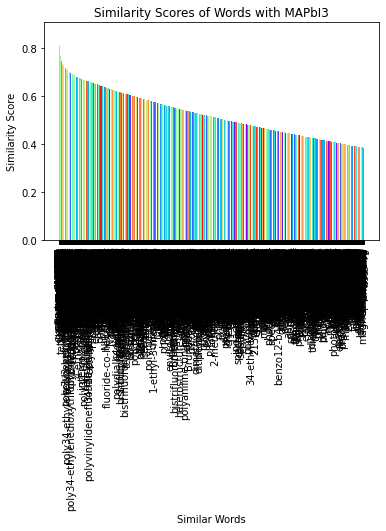

In [4]:
import matplotlib.pyplot as plt

similar_words = model.similar_by_word('MAPbI3', topn=8000)

words = [word for word, score in similar_words]
scores = [score for word, score in similar_words]



import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow([random.random() for _ in range(len(words))])

plt.bar(words, scores, color=colors)
plt.xlabel('Similar Words') 
plt.ylabel('Similarity Score')
plt.title('Similarity Scores of Words with MAPbI3')
plt.xticks(rotation=90)
plt.show()

# plt.bar(words, scores)
# plt.xlabel('Similar Words') 
# plt.ylabel('Similarity Score')
# plt.title('Similarity Scores of Words with MAPbI3')
# plt.xticks(rotation=90)
# plt.show()

In [8]:
# import matplotlib.pyplot as plt
# word1 = 'MAPbI3'
# word2 = 'DMSO'
# vector1 = model[word1]
# vector2 = model[word2]
# plt.scatter(vector1[0], vector1[1], c='r', label=word1)
# plt.scatter(vector2[0], vector2[1], c='b', label=word2)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Word Similarity Scatter Plot')
# plt.legend()
# plt.show()

In [6]:
print(model.similarity('MAPbI3', 'EG'))
print(model.similarity('MAPbI3', 'NMP'))
print(model.similarity('MAPbI3', 'methanol'))
print(model.similarity('MAPbI3', 'acetate'))
print(model.similarity('MAPbI3', 'BP'))
print(model.similarity('MAPbI3','DMSO'))
print(model.similarity('MAPbI3', 'BA'))
print(model.similarity('MAPbI3', 'Butylamine'))
print(model.similarity('MAPbI3', 'EA'))
print(model.similarity('MAPbI3', 'γ-GBL'))
print(model.similarity('MAPbI3','EG'))
print(model.similarity('MAPbI3', 'acetonitrile'))
print(model.similarity('MAPbI3', 'glycol'))
print(model.similarity('stable', 'plumieride'))
print(model.similarity('unstable', 'hexane'))
print(model.similarity('unstable', 'alkyl'))
print(model.similarity('unstable', 'IPA'))
print(model.similarity('unstable', 'ethanol'))
print(model.similarity('unstable', 'ten'))
print(model.similarity('stable', 'carbetamide'))
print(model.similarity('stable', 'orthodichlorobenzene'))
print(model.similarity('unstable', 'EG'))
print(model.similarity('solvent', 'tea'))
print(model.similarity('unstable', 'acetone'))
print(model.similarity('solvent', 'ba'))


0.39802414
0.67386025
0.41247553
0.6063448
0.19900079


KeyError: "Key 'dmso' not present"